In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

### The only thing thar changes here from svar_bitcoin is that here is used the volume of bitfinex without dividing by the bitcoin market cap

In [15]:
start_date = '2017-01-01'
end_date = '2023-07-15'

In [22]:
# read and load the csv files
df_bitfinex_volume = pd.read_csv("light_data/df_bitfinex_volume.csv")
total_out_BTC_USD = pd.read_csv("light_data/total_out_BTC_USD.csv")
df_fed_ffill = pd.read_csv("light_data/fed_ffill.csv")

total_out_BTC_USD.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df_bitfinex_volume.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df_bitfinex_volume.rename(columns={"Daily Volume": "Bitfinex_Daily_Volume"}, inplace=True)
df_fed_ffill.rename(columns={"date": "Date"}, inplace=True)

total_out_BTC_USD = total_out_BTC_USD[total_out_BTC_USD["Date"] >= start_date]
df_bitfinex_volume = df_bitfinex_volume[df_bitfinex_volume["Date"] >= start_date]

df_fed_ffill = df_fed_ffill[df_fed_ffill["Date"] >= start_date]
df_fed_ffill = df_fed_ffill[df_fed_ffill["Date"] <= end_date]


In [23]:
df_fed_ffill

,Date,2yr_yield,fed_assets,m2,10yr_3mo_spread,10yr_inflation,usd_index,fed_funds,sp500
2102,2017-01-01,1.20,4451451.0,13296.0,1.94,1.95,118.3466,0.55,2238.83
2103,2017-01-02,1.20,4451451.0,13346.1,1.94,1.95,118.3466,0.55,2238.83
2104,2017-01-03,1.22,4451451.0,13346.1,1.92,1.98,119.0898,0.66,2257.83
2105,2017-01-04,1.24,4453101.0,13346.1,1.93,1.99,118.8801,0.66,2270.75
2106,2017-01-05,1.17,4453101.0,13346.1,1.85,1.95,118.0002,0.66,2269.00
...,...,...,...,...,...,...,...,...,...
4484,2023-07-11,4.88,8298312.0,20793.4,-1.50,2.24,119.2556,5.08,4439.26
4485,2023-07-12,4.72,8296923.0,20793.4,-1.61,2.26,118.1838,5.08,4472.16
4486,2023-07-13,4.59,8296923.0,20793.4,-1.71,2.24,117.7307,5.08,4510.04
4487,2023-07-14,4.74,8296923.0,20793.4,-1.66,2.24,117.5952,5.08,4505.42


<Axes: xlabel='Date'>

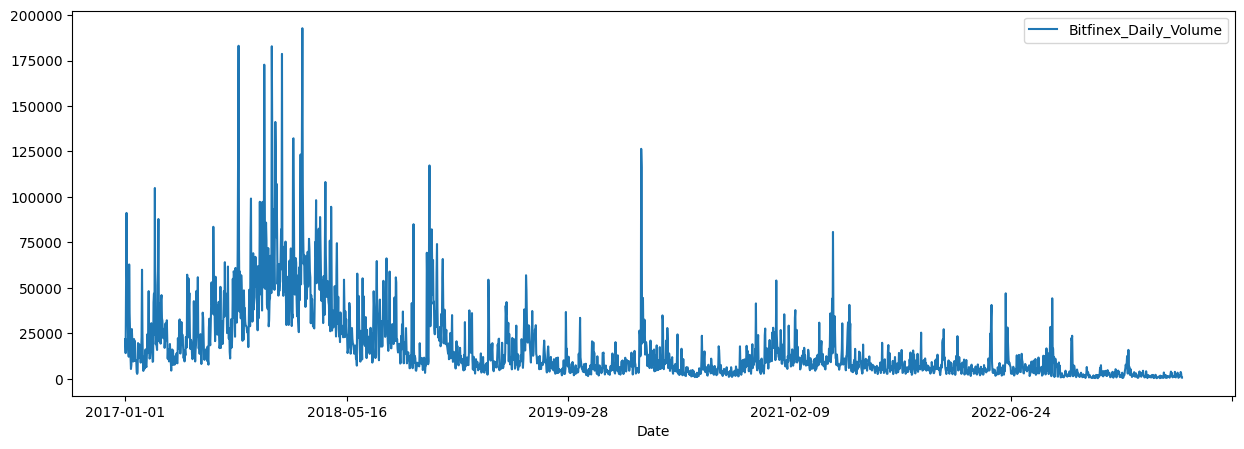

In [7]:
df_bitfinex_volume.plot(x="Date", y="Bitfinex_Daily_Volume", figsize=(15, 5))


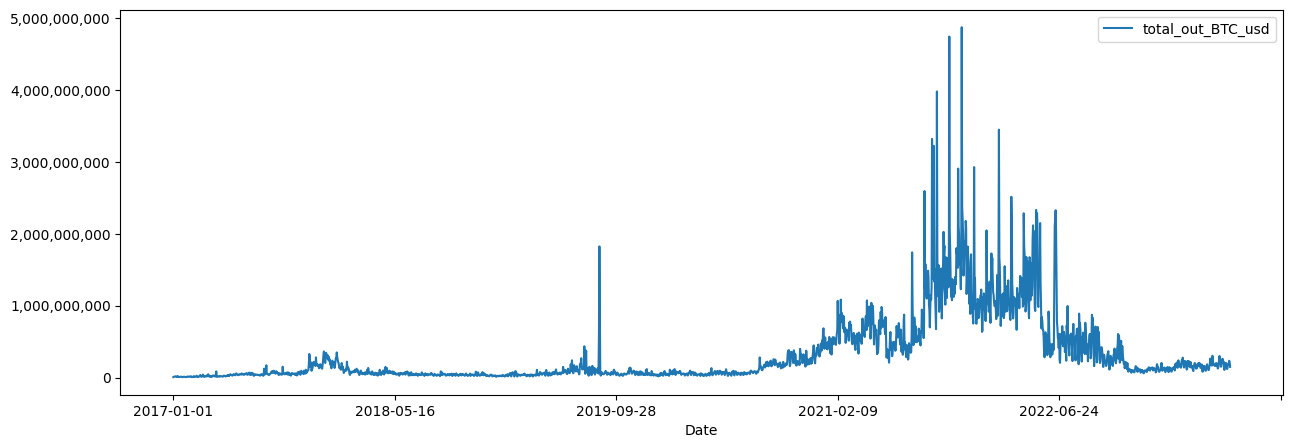

In [8]:
total_out_BTC_USD.plot(x="Date", y="total_out_BTC_usd", figsize=(15, 5))
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


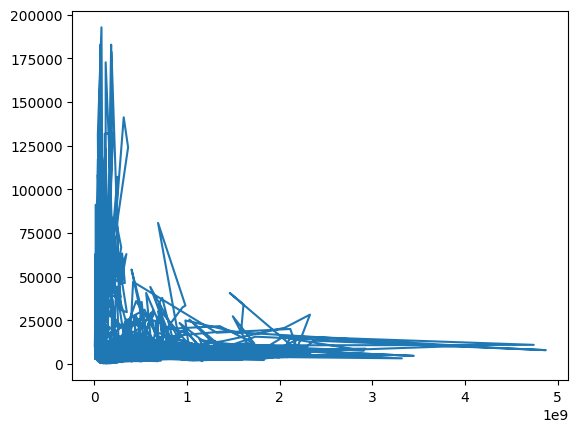

In [9]:
plt.plot(total_out_BTC_USD["total_out_BTC_usd"], df_bitfinex_volume["Bitfinex_Daily_Volume"])


# Verify stationarity

In [10]:
def test_stationarity(series):
    result = adfuller(series)
    p_value = result[1]
    
    if p_value <= 0.05:
        print("A série é estacionária.")
    else:
        print("A série não é estacionária.")

test_stationarity(total_out_BTC_USD["total_out_BTC_usd"])
test_stationarity(df_bitfinex_volume["Bitfinex_Daily_Volume"])

A série não é estacionária.
A série não é estacionária.


# Diff for non stationary series

In [25]:
total_out_BTC_USD["total_out_BTC_usd_diff"] = total_out_BTC_USD["total_out_BTC_usd"].diff()
total_out_BTC_USD = total_out_BTC_USD.dropna() 

df_bitfinex_volume["Bitfinex_Daily_Volume_diff"] = df_bitfinex_volume["Bitfinex_Daily_Volume"].diff()
df_bitfinex_volume = df_bitfinex_volume.dropna()

test_stationarity(total_out_BTC_USD["total_out_BTC_usd_diff"]) 
test_stationarity(df_bitfinex_volume["Bitfinex_Daily_Volume_diff"])


A série é estacionária.
A série é estacionária.


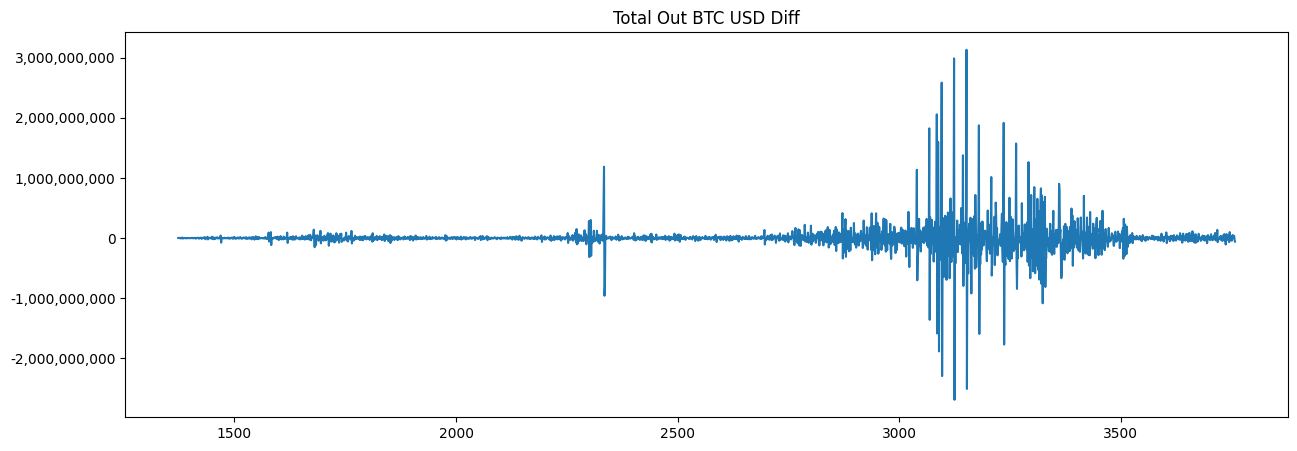

In [35]:
total_out_BTC_USD["total_out_BTC_usd_diff"].plot(figsize=(15, 5), title="Total Out BTC USD Diff")
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


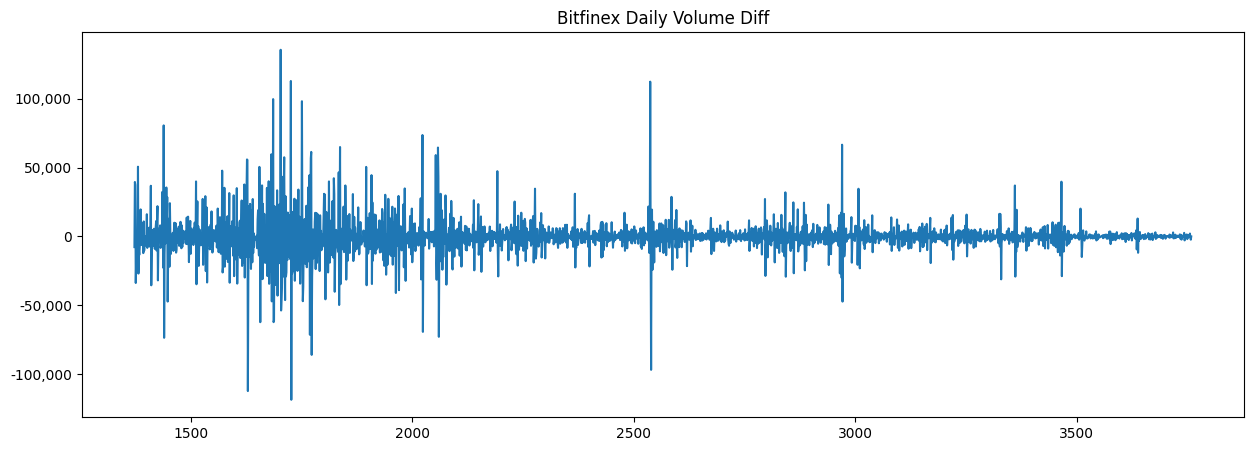

In [36]:
df_bitfinex_volume["Bitfinex_Daily_Volume_diff"].plot(figsize=(15, 5), title="Bitfinex Daily Volume Diff")
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


In [26]:
df_var = pd.concat([total_out_BTC_USD["total_out_BTC_usd_diff"], df_bitfinex_volume["Bitfinex_Daily_Volume_diff"]],axis=1)
df_var = df_var.set_index(df_bitfinex_volume["Date"]) 
df_var

,total_out_BTC_usd_diff,Bitfinex_Daily_Volume_diff
Date,,
2017-01-02,3.154958e+06,-7700.678791
2017-01-03,3.245569e+06,39620.883054
2017-01-04,2.824595e+06,37475.986099
2017-01-05,2.916766e+06,-33799.679819
2017-01-06,-1.726412e+06,-16802.146790
...,...,...
2023-07-11,1.943238e+06,270.397586
2023-07-12,1.397913e+07,2126.714128
2023-07-13,3.742569e+07,-780.506509


# Adjust VAR Model

In [27]:
model = VAR(df_var)
result = model.fit(2)  # 2 é o atraso (número de lags)

print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 10, Nov, 2023
Time:                     16:42:49
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    57.3443
Nobs:                     2384.00    HQIC:                   57.3289
Log likelihood:          -75081.1    FPE:                7.83072e+24
AIC:                      57.3201    Det(Omega_mle):     7.79798e+24
--------------------------------------------------------------------
Results for equation total_out_BTC_usd_diff
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                            124107.877036   4449981.086606            0.028           0.978
L1.total_out_BTC_usd_diff            -0.323104         0.019691          -16

/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
# Fazendo previsões para 2 períodos à frente
forecast = result.forecast(df_var.values, steps=2)

# Exibindo as previsões
print("Previsões:")
print(forecast)

Previsões:
[[ 2.43293837e+07  6.33262214e+02]
 [ 9.01357462e+06 -2.13976416e+02]]


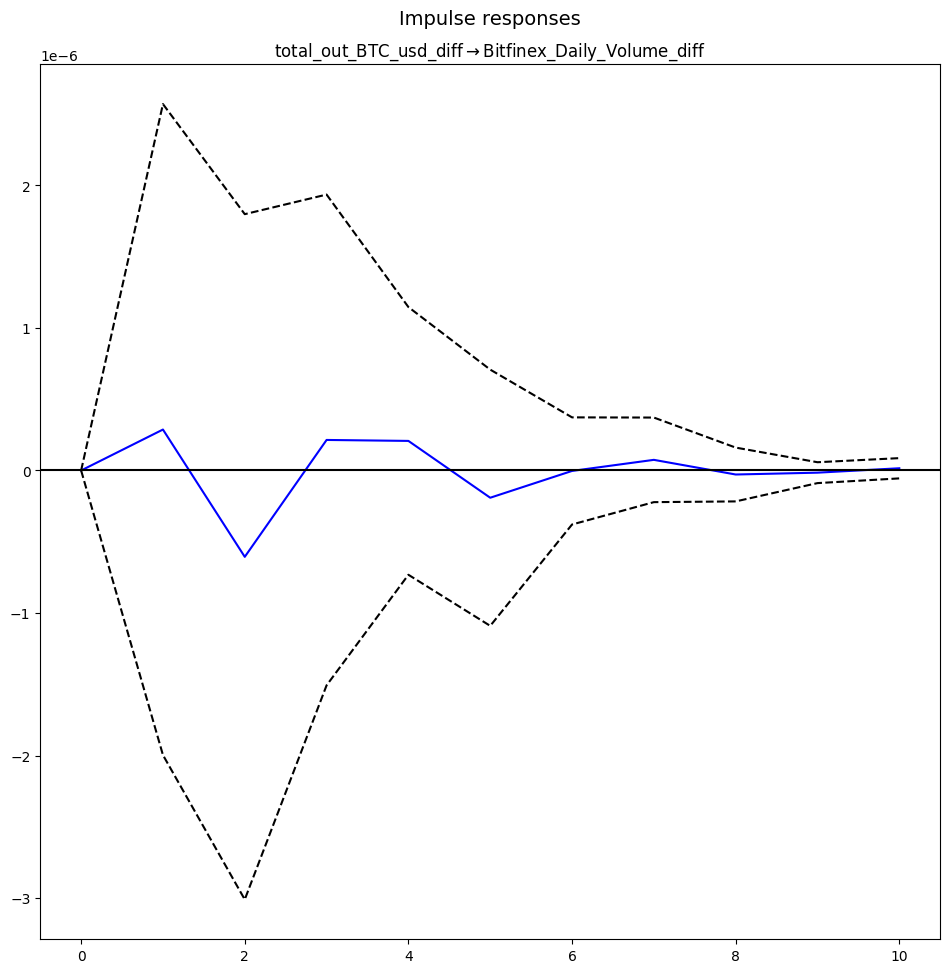

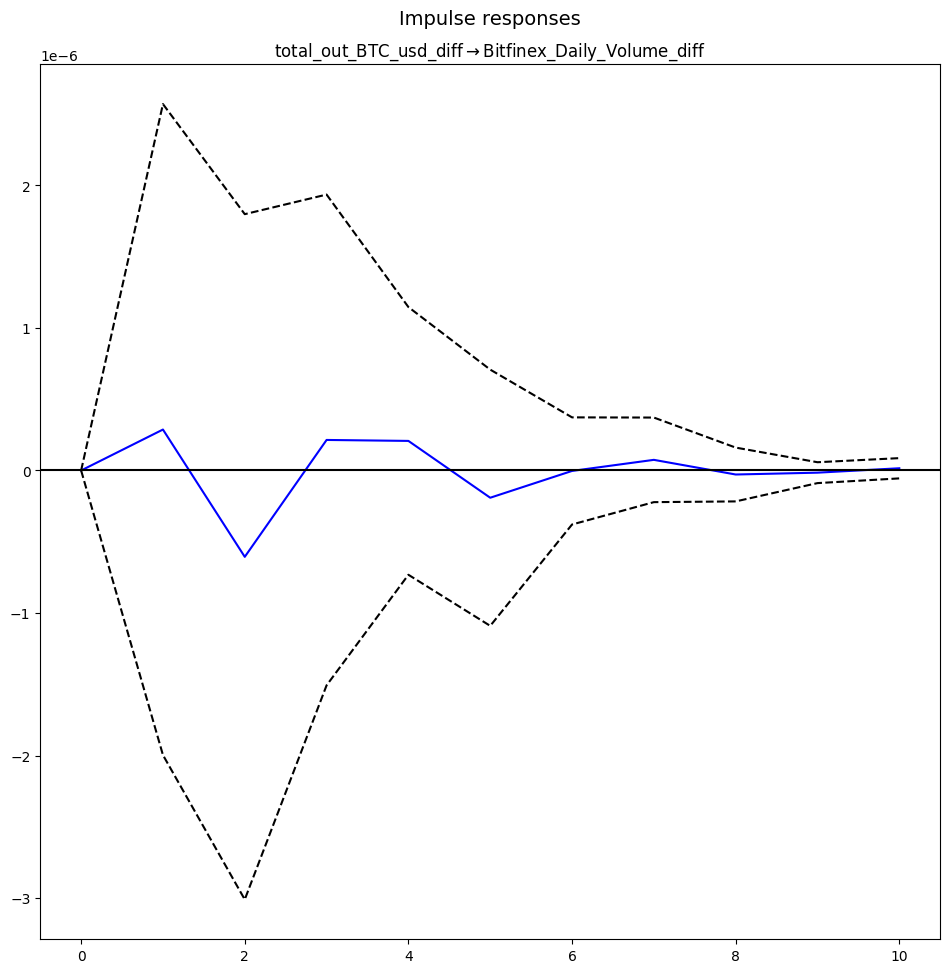

In [30]:
# Analisando o efeito de um choque nas variáveis (por exemplo, um aumento de 10 no PIB)
irf = result.irf(10)
irf.plot(impulse='total_out_BTC_usd_diff', response='Bitfinex_Daily_Volume_diff')

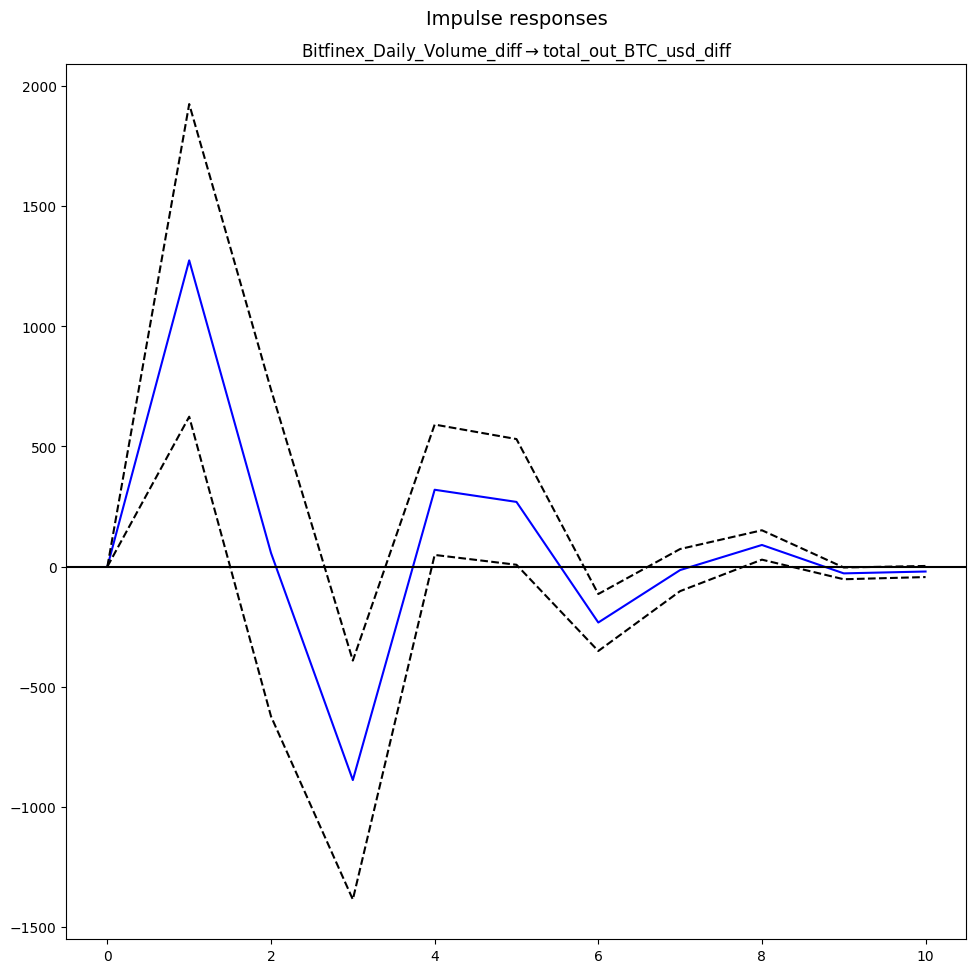

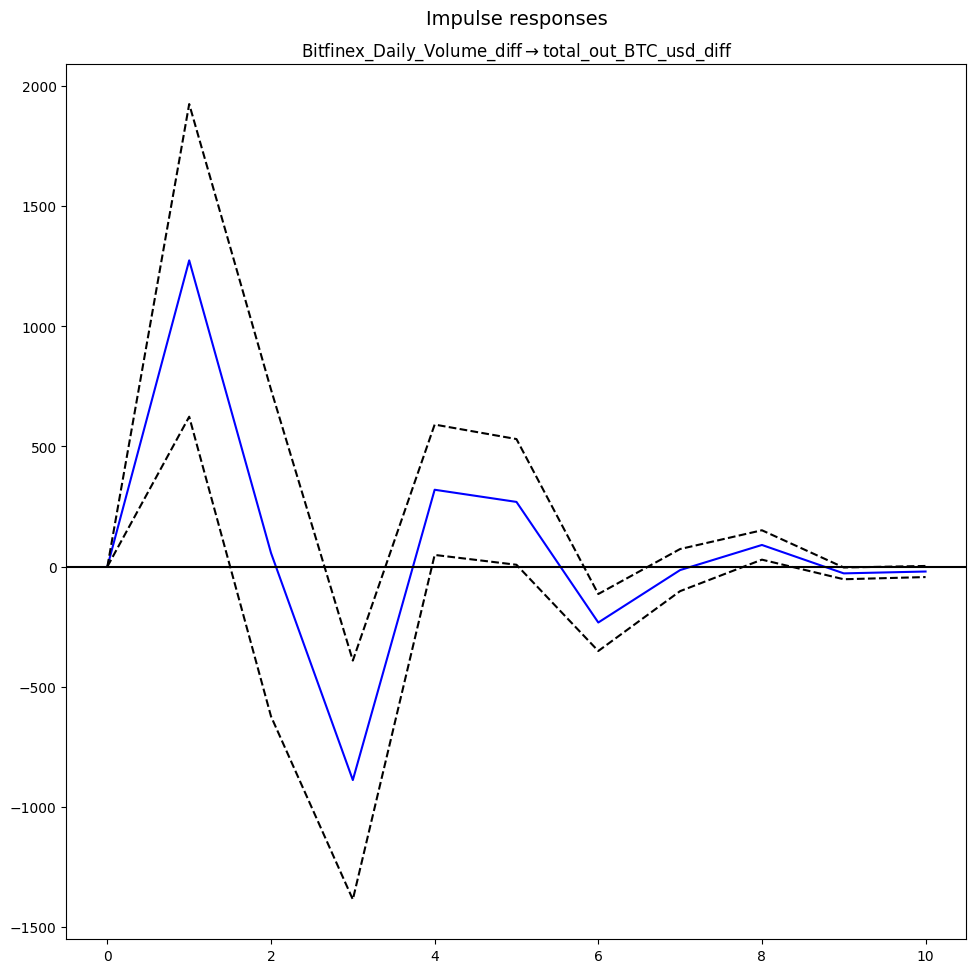

In [31]:
# Analisando o efeito de um choque nas variáveis (por exemplo, um aumento de 10 no PIB)
irf = result.irf(10)
irf.plot(impulse='Bitfinex_Daily_Volume_diff', response='total_out_BTC_usd_diff')

Causalidade de granger 

In [42]:
from statsmodels.tsa.stattools import grangercausalitytests

# Teste de causalidade de Granger para a relação entre as variáveis 1 e 2, com atrasos até 2 períodos
max_lag = 60
test_result = grangercausalitytests(df_var[['total_out_BTC_usd_diff','Bitfinex_Daily_Volume_diff']], max_lag, verbose=True)

# O teste_result conterá estatísticas e valores p para cada atraso testado
# Verifique os resultados para cada atraso e interprete os valores p para determinar a causalidade de Granger


/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.5186 , p=0.0012  , df_denom=2382, df_num=1
ssr based chi2 test:   chi2=10.5319 , p=0.0012  , df=1
likelihood ratio test: chi2=10.5087 , p=0.0012  , df=1
parameter F test:         F=10.5186 , p=0.0012  , df_denom=2382, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.9332  , p=0.0001  , df_denom=2379, df_num=2
ssr based chi2 test:   chi2=17.9039 , p=0.0001  , df=2
likelihood ratio test: chi2=17.8370 , p=0.0001  , df=2
parameter F test:         F=8.9332  , p=0.0001  , df_denom=2379, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.1861  , p=0.0003  , df_denom=2376, df_num=3
ssr based chi2 test:   chi2=18.6130 , p=0.0003  , df=3
likelihood ratio test: chi2=18.5407 , p=0.0003  , df=3
parameter F test:         F=6.1861  , p=0.0003  , df_denom=2376, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.1499  , p=0.

In [43]:
max_lag = 60
test_result = grangercausalitytests(df_var[['Bitfinex_Daily_Volume_diff','total_out_BTC_usd_diff']], max_lag, verbose=True)

/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3341  , p=0.5633  , df_denom=2382, df_num=1
ssr based chi2 test:   chi2=0.3346  , p=0.5630  , df=1
likelihood ratio test: chi2=0.3345  , p=0.5630  , df=1
parameter F test:         F=0.3341  , p=0.5633  , df_denom=2382, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1235  , p=0.8838  , df_denom=2379, df_num=2
ssr based chi2 test:   chi2=0.2475  , p=0.8836  , df=2
likelihood ratio test: chi2=0.2475  , p=0.8836  , df=2
parameter F test:         F=0.1235  , p=0.8838  , df_denom=2379, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4024  , p=0.7513  , df_denom=2376, df_num=3
ssr based chi2 test:   chi2=1.2108  , p=0.7504  , df=3
likelihood ratio test: chi2=1.2105  , p=0.7505  , df=3
parameter F test:         F=0.4024  , p=0.7513  , df_denom=2376, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3180  , p=0.